<img src="images/image.png" width="500" height="300" />


# **Sales Forecasting and Optimization**

## **Data Description**
This project uses historical retail sales data sourced from [Kaggle - Sales Forecasting Dataset](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting). The dataset (`train.csv`) contains 9,800 rows and 18 columns describing customer details, order information, product categories, and financial transactions. The goal of this project is to build a machine learning model that forecasts the **Sales** amount—our target variable—based on available features to support strategic decisions in sales optimization, inventory planning, and customer segmentation.
 
---

## **Data Dictionary**

| Column Name      | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| `Row ID`         | Unique numeric identifier for each row in the dataset.                      |
| `Order ID`       | Unique identifier for each order.                                           |
| `Order Date`     | The date when the order was placed. (Format: DD/MM/YYYY)                    |
| `Ship Date`      | The date when the order was shipped. (Format: DD/MM/YYYY)                   |
| `Ship Mode`      | Shipping method used (e.g., Second Class, Standard Class).                  |
| `Customer ID`    | Unique identifier for each customer.                                        |
| `Customer Name`  | Name of the customer who placed the order.                                  |
| `Segment`        | Customer segment (e.g., Consumer, Corporate, Home Office).                  |
| `Country`        | Country of the customer.                                                    |
| `City`           | City of the customer.                                                       |
| `State`          | State of the customer.                                                      |
| `Postal Code`    | Postal/ZIP code (may contain missing values).                              |
| `Region`         | Geographic region of the customer (e.g., West, South).                      |
| `Product ID`     | Unique identifier for each product.                                         |
| `Category`       | Main category of the product (e.g., Furniture, Office Supplies, Technology).|
| `Sub-Category`   | Sub-category of the product (e.g., Chairs, Labels).                         |
| `Product Name`   | Name of the product.                                                        |
| `Sales`          | 💡 **Target** — Sale amount (in USD) for the product line.                  |

---

## **Data Overview**

### **Importing Libraries**

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime


### **Data Exploration**

In [204]:
df=pd.read_csv('data/train.csv')

In [205]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [206]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [207]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2017,2018,CA-2016-113110,19/03/2016,23/03/2016,Standard Class,BK-11260,Berenike Kampe,Consumer,United States,San Bernardino,California,92404.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [208]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [209]:
df.shape

(9800, 18)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [211]:
df.describe(exclude='object')

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [212]:
df.describe(exclude='number')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


## **Data Visualization**

In [213]:
import pandas as pd
import plotly.express as px
from datetime import timedelta

df1 = pd.read_csv('data/train.csv', parse_dates=['Order Date', 'Ship Date'])


df1['Order Date'] = pd.to_datetime(df1['Order Date'], dayfirst=True)
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'], dayfirst=True)


analysis_date = df1['Order Date'].max() + timedelta(days=1)

# RFM calculation
rfm = df1.groupby('Customer ID').agg({
    'Order Date': lambda x: (analysis_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).reset_index()
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Define churn logic
rfm['Churn'] = (rfm['Recency'] > 90).astype(int)

# Merge RFM into main df
df1 = df1.merge(rfm, on='Customer ID', how='left')
df1['Month'] = df1['Order Date'].dt.to_period('M').astype(str)
df1['Delivery Time (days)'] = (df1['Ship Date'] - df1['Order Date']).dt.days

custom_palette = ['#211C84', '#4D55CC', '#7A73D1', '#B5A8D5']

### 📊 Recency Distribution – Identifying Customer Engagement

The histogram of **Recency** shows that many customers have not made recent purchases, with a concentration in higher recency values. This indicates a risk of **customer churn** and highlights the importance of re-engagement efforts.

**Insight**: A significant portion of customers have not transacted recently (Recency > 90 days), signaling a need for reactivation campaigns targeting inactive segments.

In [214]:
fig_recency = px.histogram(
    rfm, x='Recency', nbins=30, title='Recency Distribution',
    color_discrete_sequence=[custom_palette[0]]
)
fig_recency.show()

### 📈 Monthly Sales Trend – Seasonality and Performance

This line chart illustrates **monthly sales trends** over time. There are clear peaks and troughs, suggesting potential seasonality or campaign-driven demand.

**Insight**: Understanding seasonal spikes can help optimize marketing spend and inventory levels. Sales peaks may align with holidays or promotions, presenting opportunities for targeted planning.

In [215]:
fig_monthly_sales = px.line(
    df1.groupby('Month')['Sales'].sum().reset_index(),
    x='Month', y='Sales',
    title='Monthly Sales Trend',
    color_discrete_sequence=[custom_palette[0]]
)
fig_monthly_sales.show()

### 🧩 Sales by Category & Churn – Risk in Key Categories

This grouped bar chart highlights sales distribution across categories, segmented by **customer churn** status. Notably, churned customers still represent a significant portion of sales in key categories.

**Insight**: Categories like **Technology** or **Furniture** show high churned-customer sales, implying a potential revenue drop if retention isn't improved in those areas.

In [216]:
fig_category_churn = px.bar(
    df1.groupby(['Category', 'Churn'])['Sales'].sum().reset_index(),
    x='Category', y='Sales', color='Churn', barmode='group',
    title='Sales by Category & Churn',
    color_continuous_scale=custom_palette[1:3]
)
fig_category_churn.show()

### 📦 Delivery Time by Ship Mode – Operational Efficiency

The box plot visualizes **delivery time** variations across ship modes. Standard Class exhibits the widest range, while Same Day and First Class are more consistent.

**Insight**: The variability in Standard Class delivery times could affect customer satisfaction. Improving consistency in this mode may help reduce churn and improve loyalty.

In [217]:
fig_delivery = px.box(
    df1, x='Ship Mode', y='Delivery Time (days)',
    title='Delivery Time by Ship Mode',
    color_discrete_sequence=[custom_palette[2]]
)
fig_delivery.show()

## **Data Preprocessing**

### **Renaming Columns**

In [218]:
df.rename(columns={
    'Ship Mode': 'Ship_Mode',
    'Sub-Category': 'Sub_Category',
    'Order Date': 'Order_Date',
    'Ship Date': 'Ship_Date',
    'Product Name': 'Product_Name'
}, inplace=True)

### **Checking duplicates**

`Checking duplicates on whole data`

In [219]:
df.duplicated().sum()

0

`Checking duplicates on Row ID column`

In [220]:
df.duplicated(subset='Row ID').sum()

0

### **Checking Nulls**

In [221]:
df.isnull().sum()

Row ID            0
Order ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [222]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Row ID           0.000000
Order ID         0.000000
Order_Date       0.000000
Ship_Date        0.000000
Ship_Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.112245
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub_Category     0.000000
Product_Name     0.000000
Sales            0.000000
dtype: float64


`As the percentage of nulls was 0.11% we decided to drop them`

In [223]:
df = df.dropna(subset=['Postal Code'])

In [224]:
df.isnull().sum()

Row ID           0
Order ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
dtype: int64

### **Handling Outliers using IQR method**

**We checked the outliers on numerical columns in our data which are `Postal Code`,`Sales`**

In [225]:
outliers_cols=['Postal Code','Sales']
for col in outliers_cols:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  lower_outliers = df[df[col] < (q1 - norm_range)]
  upper_outliers = df[df[col] > (q3 + norm_range)]
  outliers = len(lower_outliers)+len(upper_outliers)
  print(f"The number of outliers in {col} is : {outliers}")

The number of outliers in Postal Code is : 0
The number of outliers in Sales is : 1141


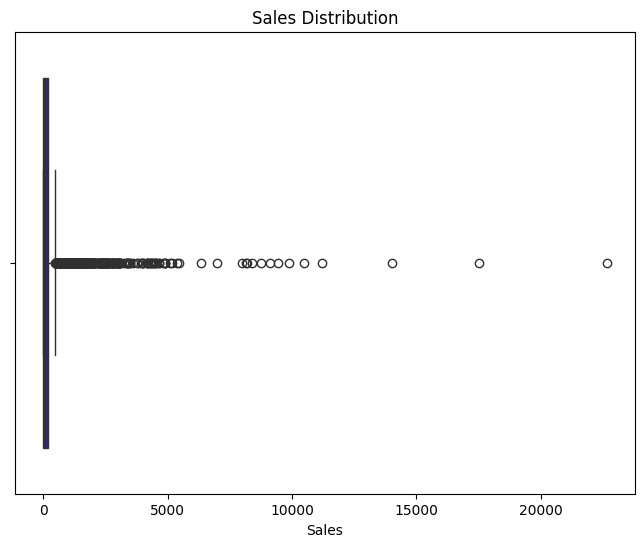

In [226]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales'], color='#211C84')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()

In [227]:
q1 = np.percentile(df['Sales'], 25)
q3 = np.percentile(df['Sales'], 75)
norm_range = (q3 - q1) * 1.5
df['Sales'] = np.where(df['Sales'] < (q1 - norm_range), q1 - norm_range, df['Sales'])
df['Sales'] = np.where(df['Sales'] > (q3 + norm_range), q3 + norm_range, df['Sales'])

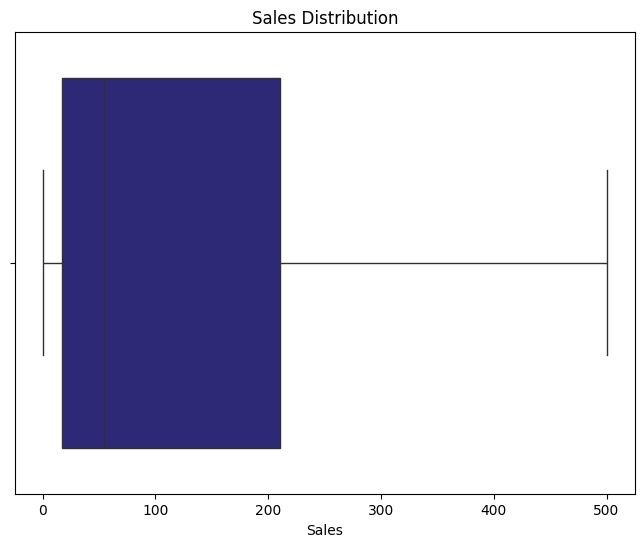

In [228]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales'], color='#211C84')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()

### **Encoding**

##### **Checking unique values in Categorical columns**

In [229]:
categorical_cols = ['Ship_Mode', 'Segment', 'Country','City','State','Region','Category','Sub_Category','Product_Name']
for col in categorical_cols:
    print(f"The number of unique values in {col}: {df[col].nunique()}")

The number of unique values in Ship_Mode: 4
The number of unique values in Segment: 3
The number of unique values in Country: 1
The number of unique values in City: 529
The number of unique values in State: 48
The number of unique values in Region: 4
The number of unique values in Category: 3
The number of unique values in Sub_Category: 17
The number of unique values in Product_Name: 1848


In [230]:
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Ship_Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Unique values in Segment: ['Consumer' 'Corporate' 'Home Office']
Unique values in Country: ['United States']
Unique values in City: ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 

In [231]:
for col in categorical_cols:
    print(f"Value counts in {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts in Ship_Mode:
Ship_Mode
Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: count, dtype: int64


Value counts in Segment:
Segment
Consumer       5096
Corporate      2948
Home Office    1745
Name: count, dtype: int64


Value counts in Country:
Country
United States    9789
Name: count, dtype: int64


Value counts in City:
City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: count, Length: 529, dtype: int64


Value counts in State:
State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia             

##### **Converting all text in the `Product Name` column to lowercase and removing punctuation**

In [232]:
df['Product_Name'] = df['Product_Name'].str.lower().str.replace('[^\w\s]', '')

##### **Label encoding**

In [233]:
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order_Date     9789 non-null   object 
 3   Ship_Date      9789 non-null   object 
 4   Ship_Mode      9789 non-null   int32  
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   int32  
 8   Country        9789 non-null   int32  
 9   City           9789 non-null   int32  
 10  State          9789 non-null   int32  
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   int32  
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   int32  
 15  Sub_Category   9789 non-null   int32  
 16  Product_Name   9789 non-null   int32  
 17  Sales          9789 non-null   float64
dtypes: float64(2)

In [235]:
df.head()

,Row ID,Order ID,Order_Date,Ship_Date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,2,CG-12520,Claire Gute,0,0,194,15,42420.0,2,FUR-BO-10001798,0,4,385,261.960
1,2,CA-2017-152156,08/11/2017,11/11/2017,2,CG-12520,Claire Gute,0,0,194,15,42420.0,2,FUR-CH-10000454,0,5,830,500.108
2,3,CA-2017-138688,12/06/2017,16/06/2017,2,DV-13045,Darrin Van Huff,1,0,265,3,90036.0,3,OFF-LA-10000240,1,10,1437,14.620
3,4,US-2016-108966,11/10/2016,18/10/2016,3,SO-20335,Sean O'Donnell,0,0,153,8,33311.0,2,FUR-TA-10000577,0,16,365,500.108
4,5,US-2016-108966,11/10/2016,18/10/2016,3,SO-20335,Sean O'Donnell,0,0,153,8,33311.0,2,OFF-ST-10000760,1,14,572,22.368


## **Feature Engineering**

**Converting the `Order Date` and `Ship Date` columns from string format to datetime**

In [236]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d/%m/%Y')

##### **1) Extracting specific components from the `Order Date` column :**
- `df['Year']`: extracts the year (e.g., 2016) from each order date.
- `df['Month']`: extracts the month as a number (1 to 12).
- `df['Day']`: extracts the day of the month (1 to 31).
- `df['Weekday']`: extracts the day of the week as an integer (0 = Monday, 6 = Sunday).

In [237]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day
df['Weekday'] = df['Order_Date'].dt.weekday

##### **2) Calculating the shipping duration from `Ship Date` and `Order Date`**

In [238]:
df['Shipping_Duration'] = (df['Ship_Date'] - df['Order_Date']).dt.days

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9789 non-null   int64         
 1   Order ID           9789 non-null   object        
 2   Order_Date         9789 non-null   datetime64[ns]
 3   Ship_Date          9789 non-null   datetime64[ns]
 4   Ship_Mode          9789 non-null   int32         
 5   Customer ID        9789 non-null   object        
 6   Customer Name      9789 non-null   object        
 7   Segment            9789 non-null   int32         
 8   Country            9789 non-null   int32         
 9   City               9789 non-null   int32         
 10  State              9789 non-null   int32         
 11  Postal Code        9789 non-null   float64       
 12  Region             9789 non-null   int32         
 13  Product ID         9789 non-null   object        
 14  Category     

In [240]:
df.columns

Index(['Row ID', 'Order ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Year', 'Month', 'Day', 'Weekday',
       'Shipping_Duration'],
      dtype='object')

In [241]:
df.head()

,Row ID,Order ID,Order_Date,Ship_Date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub_Category,Product_Name,Sales,Year,Month,Day,Weekday,Shipping_Duration
0,1,CA-2017-152156,2017-11-08,2017-11-11,2,CG-12520,Claire Gute,0,0,194,...,FUR-BO-10001798,0,4,385,261.960,2017,11,8,2,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,2,CG-12520,Claire Gute,0,0,194,...,FUR-CH-10000454,0,5,830,500.108,2017,11,8,2,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,2,DV-13045,Darrin Van Huff,1,0,265,...,OFF-LA-10000240,1,10,1437,14.620,2017,6,12,0,4
3,4,US-2016-108966,2016-10-11,2016-10-18,3,SO-20335,Sean O'Donnell,0,0,153,...,FUR-TA-10000577,0,16,365,500.108,2016,10,11,1,7
4,5,US-2016-108966,2016-10-11,2016-10-18,3,SO-20335,Sean O'Donnell,0,0,153,...,OFF-ST-10000760,1,14,572,22.368,2016,10,11,1,7


## **Feature Selection**

### **Dropping Unnecessary Columns**

In [242]:
df = df.drop(['Row ID', 'Customer ID', 'Product ID','Customer Name','Order ID','Ship_Date'], axis=1)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order_Date         9789 non-null   datetime64[ns]
 1   Ship_Mode          9789 non-null   int32         
 2   Segment            9789 non-null   int32         
 3   Country            9789 non-null   int32         
 4   City               9789 non-null   int32         
 5   State              9789 non-null   int32         
 6   Postal Code        9789 non-null   float64       
 7   Region             9789 non-null   int32         
 8   Category           9789 non-null   int32         
 9   Sub_Category       9789 non-null   int32         
 10  Product_Name       9789 non-null   int32         
 11  Sales              9789 non-null   float64       
 12  Year               9789 non-null   int32         
 13  Month              9789 non-null   int32         
 14  Day          

In [244]:
df.columns

Index(['Order_Date', 'Ship_Mode', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub_Category', 'Product_Name',
       'Sales', 'Year', 'Month', 'Day', 'Weekday', 'Shipping_Duration'],
      dtype='object')

In [245]:
df.head()

,Order_Date,Ship_Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub_Category,Product_Name,Sales,Year,Month,Day,Weekday,Shipping_Duration
0,2017-11-08,2,0,0,194,15,42420.0,2,0,4,385,261.960,2017,11,8,2,3
1,2017-11-08,2,0,0,194,15,42420.0,2,0,5,830,500.108,2017,11,8,2,3
2,2017-06-12,2,1,0,265,3,90036.0,3,1,10,1437,14.620,2017,6,12,0,4
3,2016-10-11,3,0,0,153,8,33311.0,2,0,16,365,500.108,2016,10,11,1,7
4,2016-10-11,3,0,0,153,8,33311.0,2,1,14,572,22.368,2016,10,11,1,7


### **Correlation**

In [246]:
correlations = df.corr()['Sales'].abs().drop('Sales').sort_values(ascending=False)
selected_features = correlations.head(35).index.tolist()
for col in correlations.index:   
    print(f"{col}: {round(correlations[col], 4)}")

Sub_Category: 0.1312
Product_Name: 0.0242
Region: 0.0203
Year: 0.0178
State: 0.0172
Day: 0.014
Order_Date: 0.0139
Month: 0.0131
Category: 0.0123
Shipping_Duration: 0.0117
City: 0.0106
Postal Code: 0.0096
Segment: 0.0069
Weekday: 0.0019
Ship_Mode: 0.0007
Country: nan


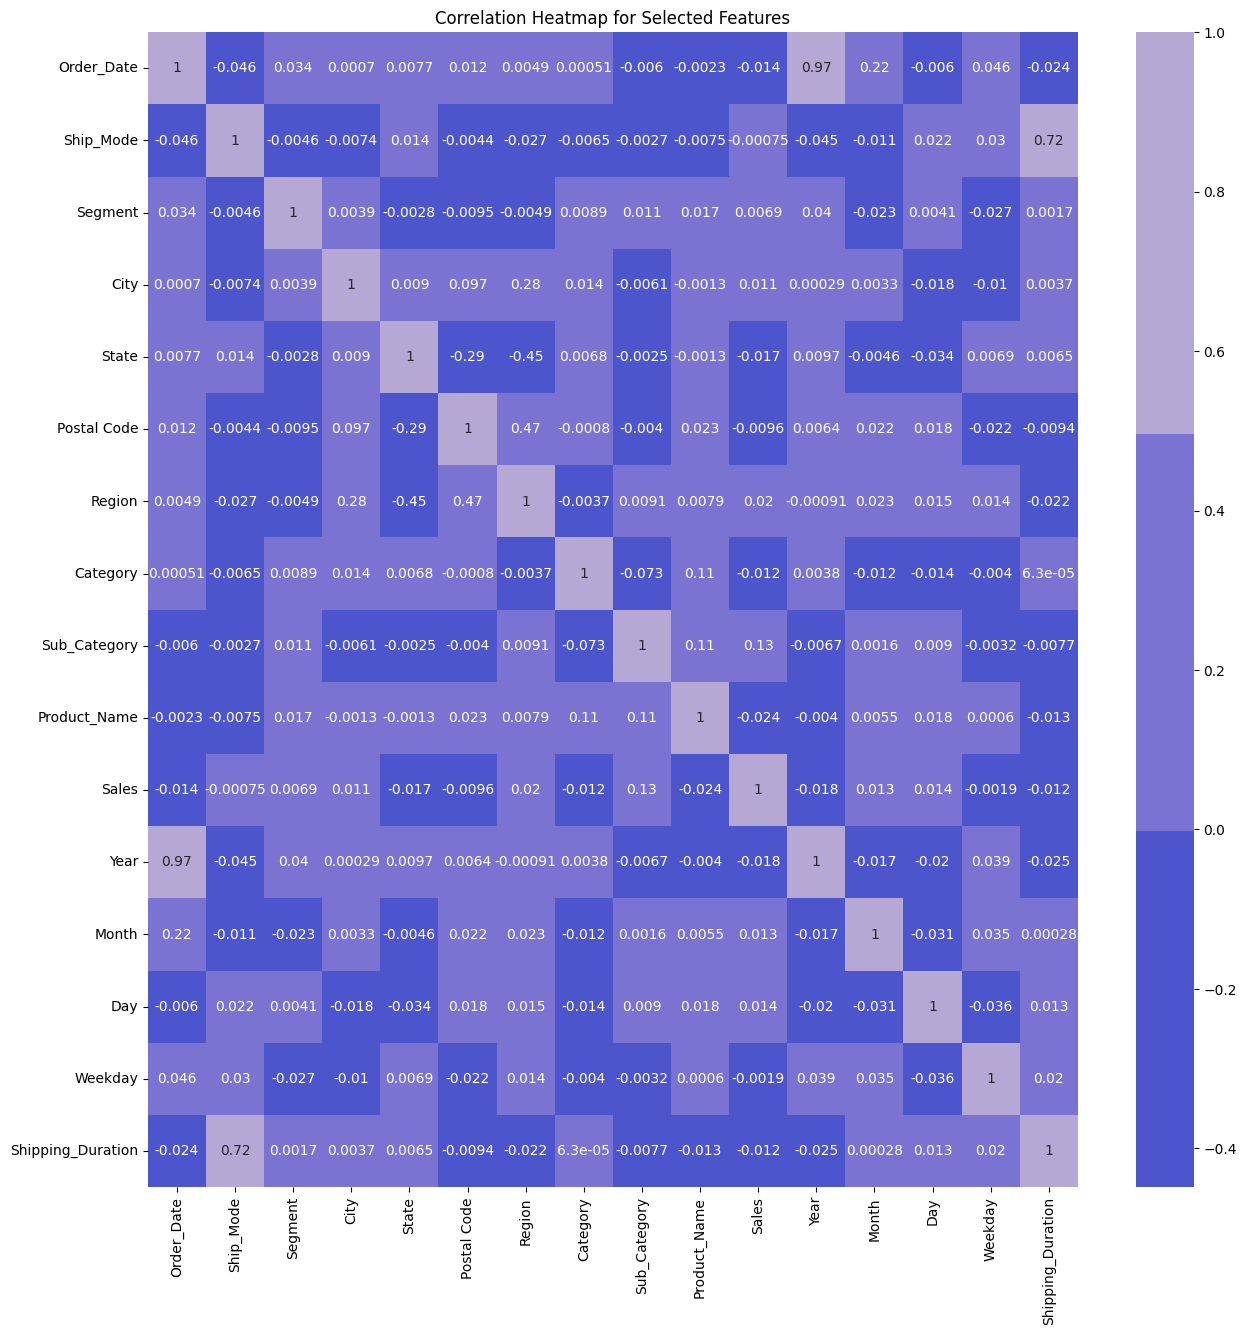

In [247]:
df=df.drop('Country',axis=1)
custom_palette = ["#211C84", "#4D55CC", "#7A73D1", "#B5A8D5"]
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette(custom_palette, as_cmap=True), center=0)
plt.title('Correlation Heatmap for Selected Features')
plt.show()


### **Dropping Unnecessary Columns After Correlation**

In [248]:
df = df.drop(['Segment','Weekday','Day','Year'], axis=1)

## **Model Training and Evaluation**

### **Forcasting Models**

#### **ARIMA,SARIMA and Prophet**

In [249]:
oldest_date = df['Order_Date'].min()
newest_date = df['Order_Date'].max()

print("Oldest Date:", oldest_date)
print("Newest Date:", newest_date)

Oldest Date: 2015-01-03 00:00:00
Newest Date: 2018-12-30 00:00:00


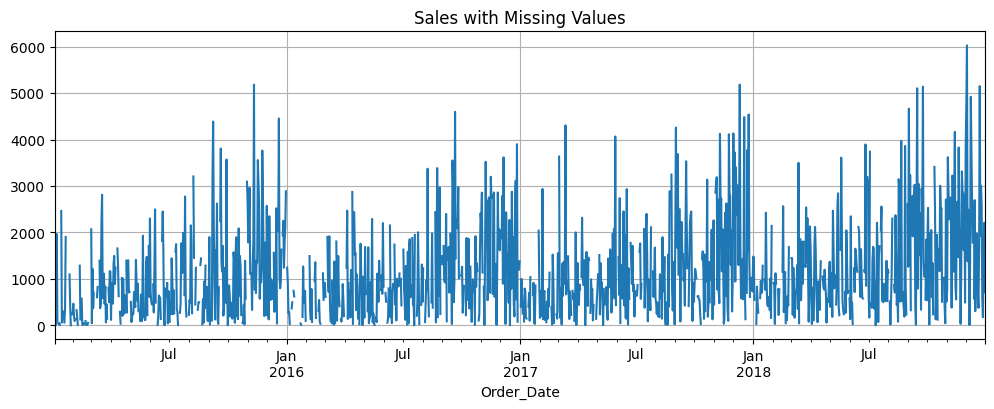

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet


df_forcasting = df[["Order_Date", "Sales"]] 

df_forcasting.set_index("Order_Date", inplace=True)

df_forcasting = df.groupby("Order_Date").sum().asfreq("D")  

df_forcasting['Sales'].plot(title="Sales with Missing Values", figsize=(12, 4))

plt.grid(True)
plt.show()


In [251]:
# ------------------- ARIMA -------------------
print("Fitting ARIMA model...")
arima_model = ARIMA(df_forcasting['Sales'].interpolate(), order=(5, 1, 2)).fit()
arima_forecast = arima_model.forecast(30)

Fitting ARIMA model...


c:\Users\Toka Khaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Toka Khaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [252]:
# ------------------- SARIMA -------------------
print("Fitting SARIMA model...")
sarima_model = SARIMAX(df_forcasting['Sales'].interpolate(), order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit()
sarima_forecast = sarima_model.forecast(30)

Fitting SARIMA model...


In [253]:
# ------------------- Prophet -------------------
print("Fitting Prophet model...")
prophet_df_forcasting = df_forcasting.reset_index().rename(columns={"Order_Date": "ds", "Sales": "y"})
prophet_df_forcasting['y'] = prophet_df_forcasting['y'].interpolate()  # Prophet can't handle NaNs
prophet = Prophet(daily_seasonality=True)
prophet.fit(prophet_df_forcasting)

future = prophet.make_future_dataframe(periods=30)
prophet_forecast = prophet.predict(future)

21:19:06 - cmdstanpy - INFO - Chain [1] start processing


Fitting Prophet model...


21:19:06 - cmdstanpy - INFO - Chain [1] done processing


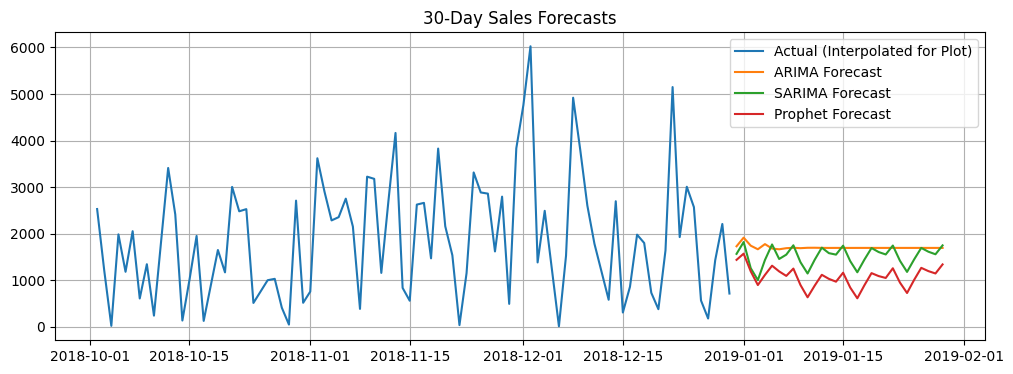

In [254]:
# ------------------- Plot Forecasts -------------------
plt.figure(figsize=(12, 4))
plt.plot(df_forcasting.index[-90:], df_forcasting['Sales'].interpolate()[-90:], label="Actual (Interpolated for Plot)")
plt.plot(df_forcasting.index[-1] + pd.to_timedelta(range(1, 31), unit='D'), arima_forecast, label="ARIMA Forecast")
plt.plot(df_forcasting.index[-1] + pd.to_timedelta(range(1, 31), unit='D'), sarima_forecast, label="SARIMA Forecast")
plt.plot(prophet_forecast['ds'][-30:], prophet_forecast['yhat'][-30:], label="Prophet Forecast")
plt.title("30-Day Sales Forecasts")
plt.legend()
plt.grid(True)
plt.show()

### **Boosting Models**

#### **Catboost,XGboost and LightGBM**

In [255]:
# Feature and Target Selection
from sklearn.model_selection import train_test_split

# Drop non-numeric or unneeded columns
X = df.drop(columns=['Sales', 'Order_Date'])
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [256]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [257]:
# Model Imports
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluation function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {'Model': name, 'MSE': mse, 'R2': r2, 'y_pred': y_pred}

In [258]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_eval = evaluate_model('XGBoost', xgb, X_test, y_test)

lgb = LGBMRegressor(n_estimators=100, random_state=42)
lgb.fit(X_train, y_train)
lgb_eval = evaluate_model('LightGBM', lgb, X_test, y_test)

cat = CatBoostRegressor(iterations=100, random_state=42, verbose=0)
cat.fit(X_train, y_train)
cat_eval = evaluate_model('CatBoost', cat, X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 7831, number of used features: 10
[LightGBM] [Info] Start training from score 140.932718


In [259]:
# Compare Model Performance
results = pd.DataFrame([xgb_eval, lgb_eval, cat_eval])[['Model', 'MSE', 'R2']]
results.sort_values(by='MSE', inplace=True)
results.reset_index(drop=True, inplace=True)
results

,Model,MSE,R2
0,LightGBM,12133.533944,0.568993
1,XGBoost,12434.270558,0.558310
2,CatBoost,12953.905015,0.539852


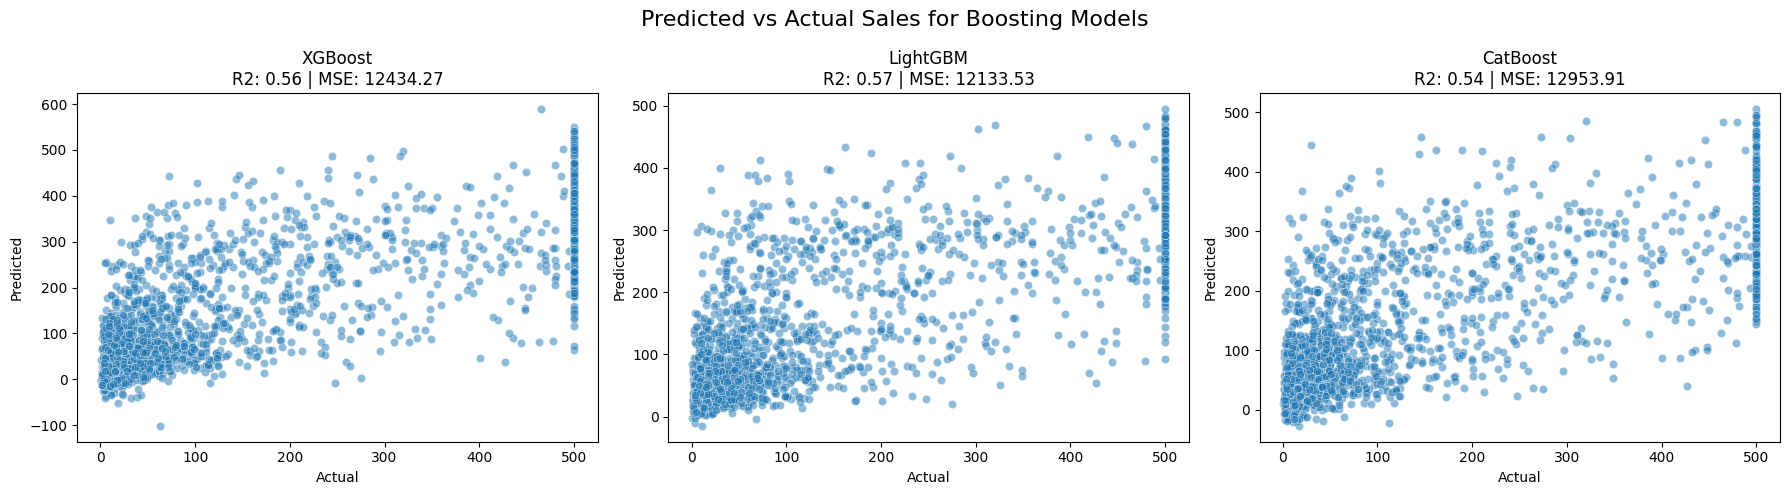

In [260]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, eval_dict in enumerate([xgb_eval, lgb_eval, cat_eval]):
    sns.scatterplot(x=y_test, y=eval_dict['y_pred'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f"{eval_dict['Model']}\nR2: {eval_dict['R2']:.2f} | MSE: {eval_dict['MSE']:.2f}")
    axes[i].set_xlabel("Actual")
    axes[i].set_ylabel("Predicted")

plt.suptitle("Predicted vs Actual Sales for Boosting Models", fontsize=16)
plt.tight_layout()
plt.show()

In [261]:
# Sklearn imports
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [262]:
# XGBoost Tuning
xgb_param_grid = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10)
}
xgb_search = RandomizedSearchCV(XGBRegressor(random_state=42), xgb_param_grid,
                                n_iter=20, cv=3, scoring='neg_mean_squared_error', random_state=42)
xgb_search.fit(X_train, y_train)
xgb_best = xgb_search.best_estimator_
xgb_tuned_eval = evaluate_model('XGBoost Tuned', xgb_best, X_test, y_test)

In [263]:
# LightGBM Tuning
lgb_param_grid = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(20, 50)
}
lgb_search = RandomizedSearchCV(LGBMRegressor(random_state=42), lgb_param_grid,
                                n_iter=20, cv=3, scoring='neg_mean_squared_error', random_state=42)
lgb_search.fit(X_train, y_train)
lgb_best = lgb_search.best_estimator_
lgb_tuned_eval = evaluate_model('LightGBM Tuned', lgb_best, X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 5220, number of used features: 10
[LightGBM] [Info] Start training from score 141.407280
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 5221, number of used features: 10
[LightGBM] [Info] Start training from score 145.588026
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 5221, number of used features: 10
[LightGBM] [Info] Start train

In [264]:
# CatBoost Tuning
cat_param_grid = {
    'iterations': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'depth': randint(3, 10)
}
cat_search = RandomizedSearchCV(CatBoostRegressor(verbose=0, random_state=42), cat_param_grid,
                                n_iter=20, cv=3, scoring='neg_mean_squared_error', random_state=42)
cat_search.fit(X_train, y_train)
cat_best = cat_search.best_estimator_
cat_tuned_eval = evaluate_model('CatBoost Tuned', cat_best, X_test, y_test)

In [265]:
# Tuning Results Comparison
tuned_results = pd.DataFrame([
    xgb_tuned_eval, lgb_tuned_eval, cat_tuned_eval
])[['Model', 'MSE', 'R2']]
tuned_results.sort_values(by='MSE', inplace=True)
tuned_results.reset_index(drop=True, inplace=True)
tuned_results

,Model,MSE,R2
0,XGBoost Tuned,12064.893703,0.571431
1,LightGBM Tuned,12091.613811,0.570482
2,CatBoost Tuned,13287.277871,0.528010


### **Bagging Models**

#### **Decision Tree and Random Forest**

In [266]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
dt_preds = dt_model.predict(X_test)

# Evaluate model performance
dt_mse = np.sqrt(mean_squared_error(y_test, dt_preds))
dt_r2 = r2_score(y_test, dt_preds)

# Print Decision Tree results
print(" Decision Tree Performance:")
print("MSE:", round(dt_mse, 2))
print("r2:", round(dt_r2, 2))

 Decision Tree Performance:
MSE: 139.41
r2: 0.31


In [267]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
rf_preds = rf_model.predict(X_test)

# Evaluate model performance
rf_mse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

# Print Random Forest results
print("\n Random Forest Performance:")
print("MSE:", round(rf_mse, 2))
print("r2:", round(rf_r2, 2))


 Random Forest Performance:
MSE: 102.91
r2: 0.62


## **Model Accuracy Comparison**

In [268]:
rf_eval = {'Model': 'Random Forest', 'MSE': rf_mse, 'R2': rf_r2}
dt_eval = {'Model': 'Decision Tree', 'MSE': dt_mse, 'R2': dt_r2}
all_results = pd.DataFrame([
    rf_eval,
    dt_eval,
    xgb_tuned_eval, 
    lgb_tuned_eval,
    cat_tuned_eval
])

print("\nModel R² Scores:")
all_results[['Model', 'R2']]




Model R² Scores:


,Model,R2
0,Random Forest,0.623808
1,Decision Tree,0.309611
2,XGBoost Tuned,0.571431
3,LightGBM Tuned,0.570482
4,CatBoost Tuned,0.528010


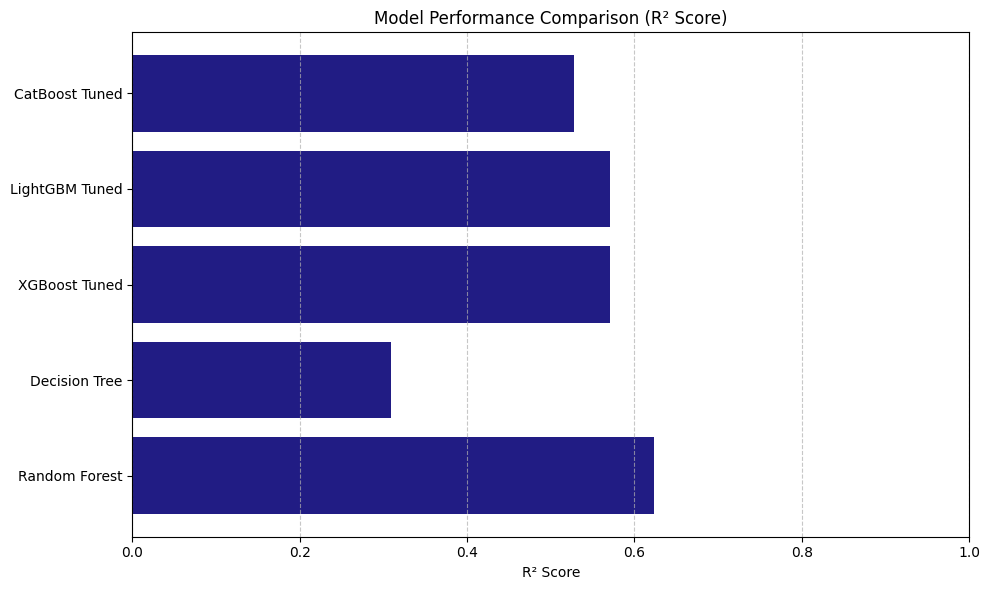

In [269]:
plt.figure(figsize=(10, 6))
plt.barh(all_results['Model'], all_results['R2'], color='#211C84')
plt.xlabel('R² Score')
plt.title('Model Performance Comparison (R² Score)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 1) 
plt.tight_layout()
plt.show()


## **Loading Models Using Joblib For Deployment**

In [270]:
import joblib
file='models/Random_Forest.pkl'
joblib.dump(rf_model,file)
model_deploy=joblib.load(open(file,'rb'))

In [271]:
import joblib
joblib.dump(scaler, 'models/scaler')

['models/scaler']

In [272]:
import joblib
joblib.dump(encoders, 'models/label_encoder.pkl')

['models/label_encoder.pkl']

## **Conclusion**

In this analysis, we evaluated the performance of several regression models, including Decision Tree, Random Forest, and tuned versions of XGBoost, LightGBM, and CatBoost. Among all the models tested, **the Random Forest Regressor achieved the highest R² score (0.624)**, indicating it explained the most variance in the target variable and delivered the most accurate predictions on the test data.

While the tuned boosting models (XGBoost, LightGBM, and CatBoost) performed reasonably well with R² scores in the range of 0.53–0.57, they did not outperform Random Forest. The Decision Tree model had the lowest performance, reinforcing the advantage of ensemble methods.

**Based on these results, we selected the Random Forest Regressor for deployment** due to its superior performance, stability, and relatively simple implementation. It strikes a strong balance between accuracy and interpretability, making it a reliable choice for our regression task.

---

<span style="color: #573E9E">

# ***Prepared By Team 7***
# ***Under supervision: Eng. Mahmoud Khorshid***

</span>